In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IsingModel.Ising2 import IsingGrid
from IsingModel.util import *

In [3]:
# Test basics
g = IsingGrid(3, 4)
g.constant_init(0, 4, 1)
print(g.energy(-np.ones([3, 4])))
print(g.energy(np.zeros([3, 4])))
print(g.energy(np.random.rand(3, 4)))
g.random_init()
print(g.energy(-np.ones([3, 4])))
print(g.energy(np.zeros([3, 4])))
print(g.energy(np.random.rand(3, 4)))

-20.5
-0.0
-4.22664337911
-4.5687652581
-0.0
-1.37152139401


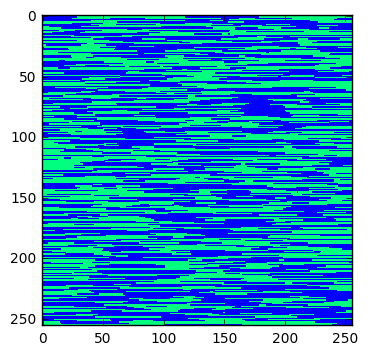

In [5]:
# Test Gibbs sampling
model = IsingGrid(256,256)
model.constant_init(0,0,100)
sample = model.random_grid(0.5)
sample,elist = model.gibbs_sampling(sample)
plt.imshow(sample, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

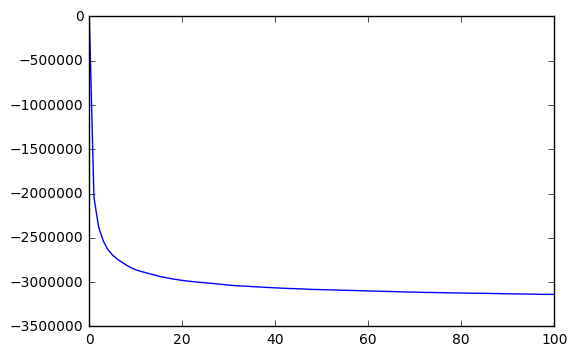

In [4]:
plt.plot(elist)
plt.autoscale(enable=True, axis='both', tight=None)

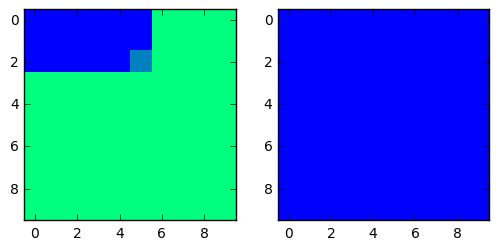

In [8]:
# test meanfield
model = IsingGrid(10,10)
model.constant_init(0,10,10)
mlist1 = model.meanfields(model.gibbs_sampling(model.random_grid(0.6))[0])
plt.subplot(121)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

mlist2 = model.meanfields(model.random_grid(0))
plt.subplot(122)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

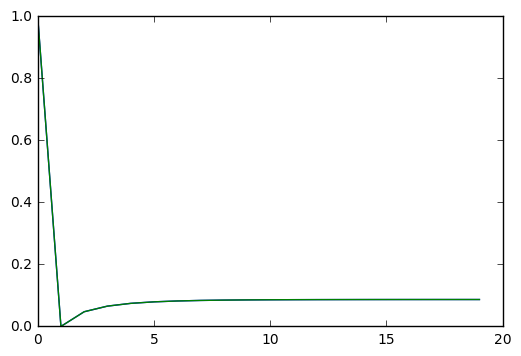

In [6]:
plt.plot(mlist1)
plt.plot(mlist2)

In [7]:
model.gibbs_sampling(model.random_grid(0.4))[0]

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [7]:
def save_video(dirname, video):
    if os.path.exists(dirname):
        return
    else:
        os.makedirs(dirname)
    for t in range(video.shape[0]):
        plt.imshow(video[t], interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
        plt.savefig(dirname + "/frame" + str(t).zfill(4)+".png")
    plt.close()

In [14]:
model = IsingGrid(256,256)
model.constant_init(0,.75,.75)
video, elist = model.gibbs_video(model.random_grid(0.9),time_max=100)
save_video("images/video8",video)

In [ ]:
finalenergylist = []
numbiterlist =[]
for a in np.linspace(0.02, 2, 10):
    ising = IsingGrid(n=256, a=a)
    ising.randomflips(.3)
    elist = ising.samplegibbs()
    numbiterlist.append(len(elist))
    finalenergylist.append(int(elist[-1]/a))
    ising.savegrid('im' + str(int(100*a)).zfill(3))

print(numbiterlist)
print(finalenergylist)

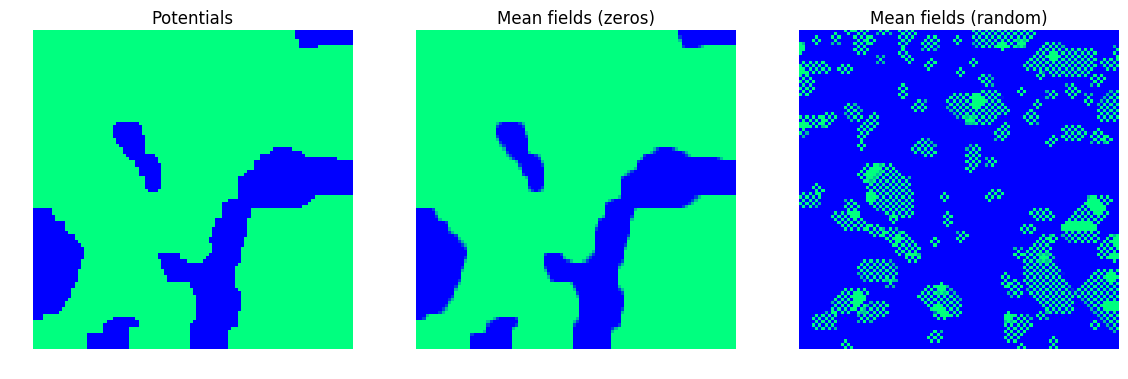

In [9]:
model = IsingGrid(100, 100)
model.constant_init(0,10,10)
grid = model.random_grid(0.3)
model.linear_factors = model.gibbs_sampling(model.random_grid(.55))[0]
plt.figure(figsize=(14,12))
plt.subplot(131)
plt.title('Potentials')
plt.axis('off')
plt.imshow(model.linear_factors, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.meanfields(np.zeros((model.height,model.width)))
plt.subplot(132)
plt.title('Mean fields (zeros)')
plt.axis('off')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.meanfields(grid)
plt.subplot(133)
plt.title('Mean fields (random)')
plt.axis('off')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

#plt.savefig('images/meanfield_qui_chie_a10.png')

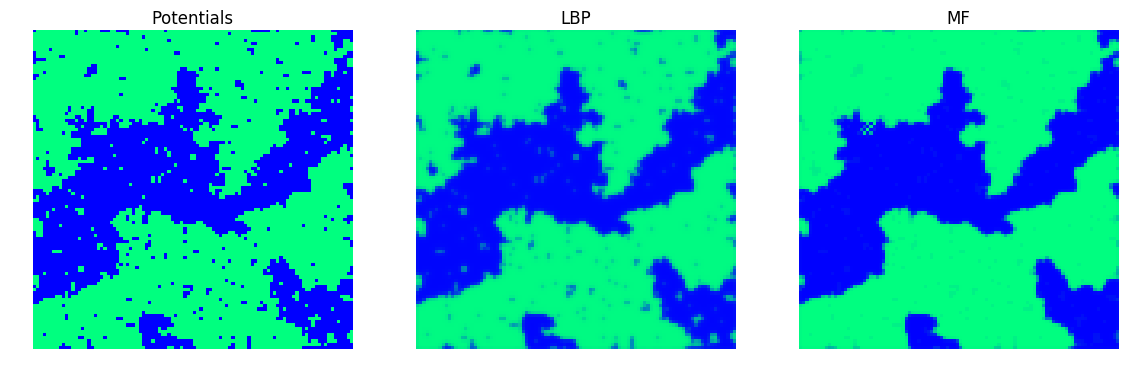

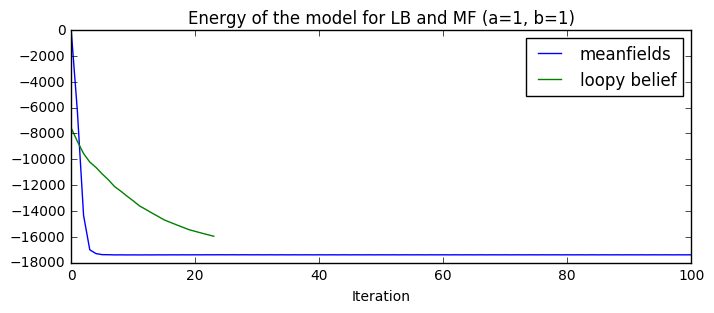

In [14]:
model = IsingGrid(100, 100)
model.constant_init(0,1,1)
model.linear_factors = model.gibbs_sampling(model.random_grid(.55))[0]
plt.figure(figsize=(14,5))
plt.subplot(131)
plt.title('Potentials')
plt.axis('off')
plt.imshow(model.linear_factors, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

_,LBPlist = model.loopybelief(damping=0.3)
plt.subplot(132)
plt.title('LBP')
plt.axis('off')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

MFlist = model.meanfields(np.zeros([model.height,model.width]))
plt.subplot(133)
plt.title('MF')
plt.axis('off')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.show()

plt.figure(figsize=(8,3))
plt.plot(MFlist,label='meanfields')
plt.plot(LBPlist,label='loopy belief')
plt.title('Energy of the model for LB and MF (a=1, b=1)')
plt.xlabel('Energy')
plt.xlabel('Iteration')
plt.legend()

In [3]:
model = IsingGrid(100, 100)
observation1 = np.zeros((model.height, model.width))
observation2 = np.zeros((model.height, model.width))
observation3 = np.zeros((model.height, model.width))

observation1[model.height//2-10:model.height//2+10,model.width//2-10:model.width//2+10] = 1
observation1[0,1:-1] = -1
observation1[-1,1:-1] = -1
observation1[1:-1,0] = -1
observation1[1:-1,-1] = -1
observation2[:2,1:-1] = 1
observation2[-2:,1:-1] = 1
observation2[1:-1,:2] = -1
observation2[1:-1,-2:] = -1
for i in range(min(model.height,model.width)):
    observation3[i,i] = 1
observation3[0,-1] = -1
observation3[-1,0] = -1

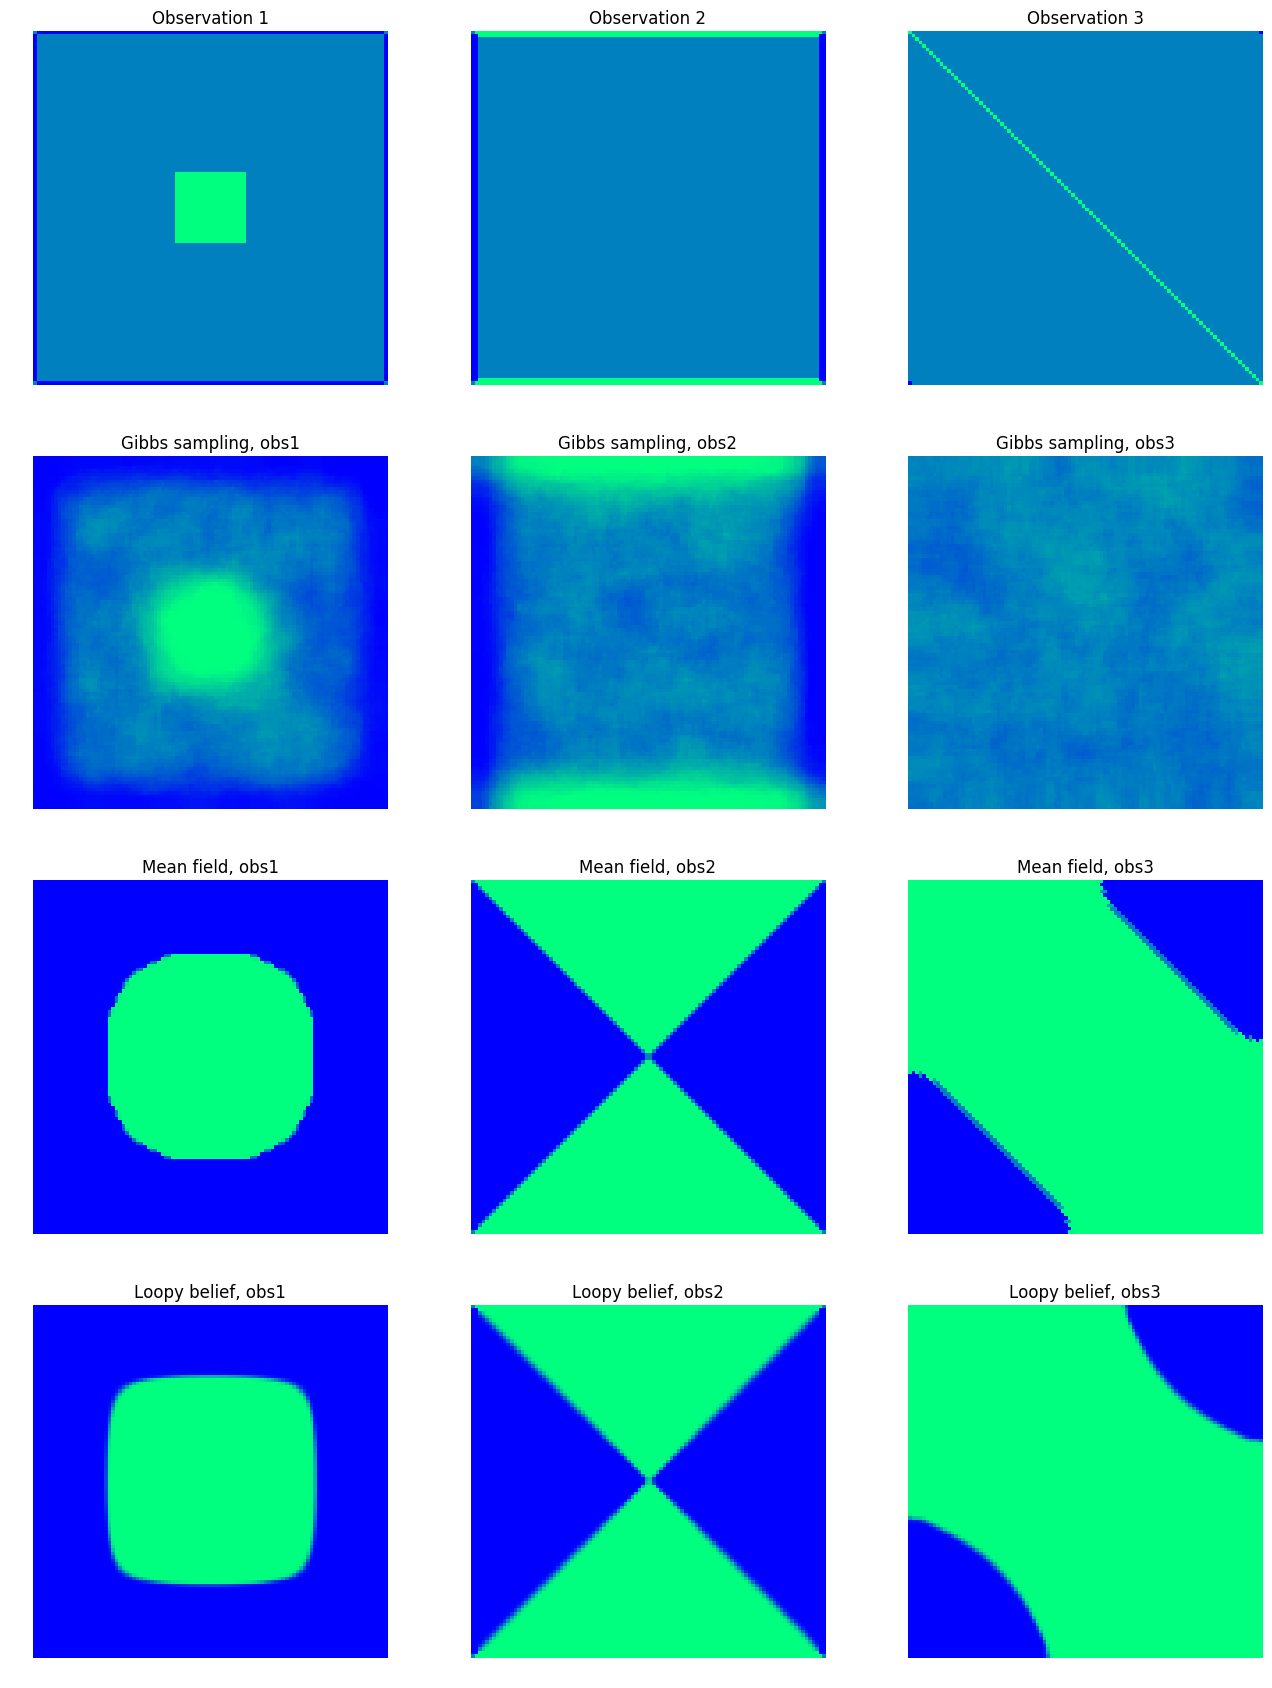

In [4]:
model = IsingGrid(100, 100)
model.constant_init(0,3,3)
grid = np.zeros((model.height, model.width))
#model.linear_factors = model.gibbs_sampling(model.random_grid(0.5))[0]/100

max_iter_mf = 500
max_iter_lb = 200
mc_step_count = 100

plt.figure(figsize=(16,21))

plt.subplot(4,3,1)
plt.imshow(observation1, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Observation 1')
plt.axis('off')
plt.subplot(4,3,2)
plt.imshow(observation2, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Observation 2')
plt.axis('off')
plt.subplot(4,3,3)
plt.imshow(observation3, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Observation 3')
plt.axis('off')

model.observe(observation1)
plt.subplot(4,3,7)
mlist1 = model.meanfields(grid, max_iter=max_iter_mf)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Mean field, obs1')
plt.axis('off')
plt.subplot(4,3,10)
video1,mess_list1 = model.loopybelief(max_iter=max_iter_lb,update_order='cyclic')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Loopy belief, obs1')
plt.axis('off')
plt.subplot(4,3,4)
gibbs_grid1 = np.zeros((mc_step_count,model.height,model.width))
gibbs_e1 = [None]*mc_step_count
for i in range(mc_step_count):
    gibbs_grid1[i], gibbs_e1[i]  = model.gibbs_sampling(observation1)
gibbs_grid_mean1 = np.mean(gibbs_grid1, axis=0)
plt.imshow(gibbs_grid_mean1, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Gibbs sampling, obs1')
plt.axis('off')


model.observe(observation2)
plt.subplot(4,3,8)
mlist2 = model.meanfields(grid, max_iter=max_iter_mf)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Mean field, obs2')
plt.axis('off')
plt.subplot(4,3,11)
_,mess_list2 = model.loopybelief(max_iter=max_iter_lb)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Loopy belief, obs2')
plt.axis('off')
plt.subplot(4,3,5)
gibbs_grid2 = np.zeros((mc_step_count,model.height,model.width))
gibbs_e2 = [None]*mc_step_count
for i in range(mc_step_count):
    gibbs_grid2[i], gibbs_e2[i]  = model.gibbs_sampling(observation2)
gibbs_grid_mean2 = np.mean(gibbs_grid2, axis=0)
plt.imshow(gibbs_grid_mean2, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Gibbs sampling, obs2')
plt.axis('off')

model.observe(observation3)
plt.subplot(4,3,9)
mlist3 = model.meanfields(grid, max_iter=max_iter_mf)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Mean field, obs3')
plt.axis('off')
plt.subplot(4,3,12)
_,mess_list3 = model.loopybelief(max_iter=max_iter_lb)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Loopy belief, obs3')
plt.axis('off')
plt.subplot(4,3,6)
gibbs_grid3 = np.zeros((mc_step_count,model.height,model.width))
gibbs_e3 = [None]*mc_step_count
for i in range(mc_step_count):
    gibbs_grid3[i], gibbs_e3[i]  = model.gibbs_sampling(observation3)
gibbs_grid_mean3 = np.mean(gibbs_grid3, axis=0)
plt.imshow(gibbs_grid_mean3, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.title('Gibbs sampling, obs3')
plt.axis('off')

plt.savefig('images/compare_mf_lb_gibbs_3_3.png')

In [6]:
def get_gibbs_e_mean(l):
    max_length = len(l[0])
    for ll in l:
        if len(ll) > max_length:
            max_length = len(ll)
    mean = np.zeros(max_length)
    nbr_elem = np.zeros(max_length)
    
    for i in range(max_length):
        for ll in l:
            if len(ll) >= i+1:
                mean[i] += ll[i]
                nbr_elem[i] += 1
    return mean / nbr_elem

def normalize_list(l):
    return [(e - l[-1])/(l[0]-l[-1]) for e in l]

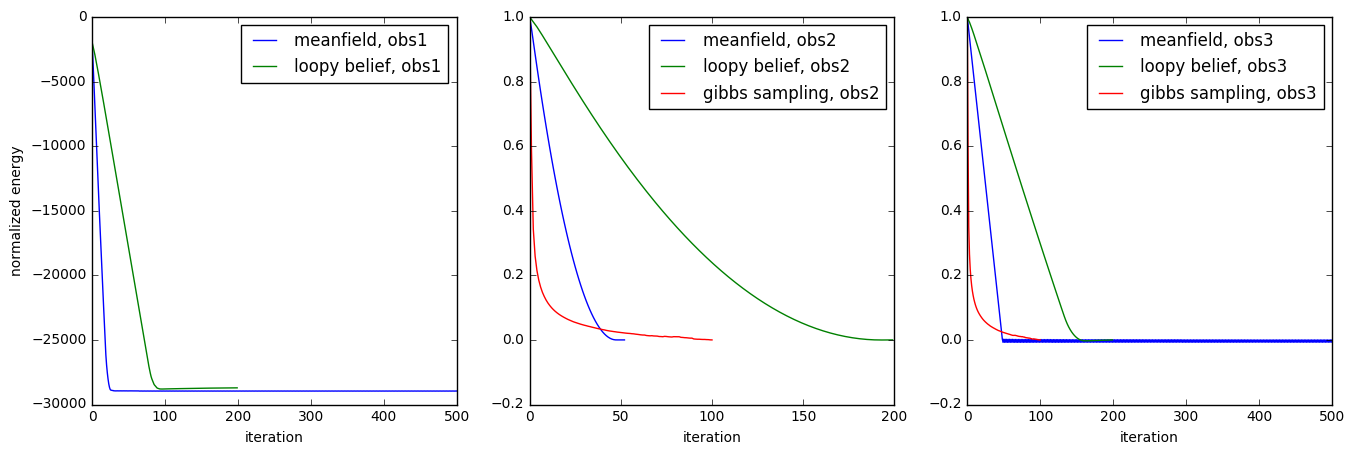

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(131)
plt.plot(mlist1,label='meanfield, obs1')
plt.plot(mess_list1,label='loopy belief, obs1')
plt.plot(get_gibbs_e_mean(gibbs_e1), label='gibbs sampling, obs1')
plt.ylabel('normalized energy')
plt.xlabel('iteration')
plt.legend()
plt.subplot(132)
plt.plot(normalize_list(mlist2),label='meanfield, obs2')
plt.plot(normalize_list(mess_list2),label='loopy belief, obs2')
plt.plot(normalize_list(get_gibbs_e_mean(gibbs_e2)), label='gibbs sampling, obs2')
plt.xlabel('iteration')
plt.legend()
plt.subplot(133)
plt.plot(normalize_list(mlist3),label='meanfield, obs3')
plt.plot(normalize_list(mess_list3),label='loopy belief, obs3')
plt.plot(normalize_list(get_gibbs_e_mean(gibbs_e3)), label='gibbs sampling, obs3')
plt.xlabel('iteration')
plt.legend()

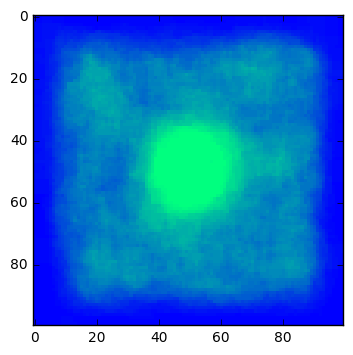

In [9]:
#comparing gibbs, mf and lb
model = IsingGrid(100, 100)
model.constant_init(0,3,3)
grid = np.zeros((model.height, model.width))

#model.observe(observation1)

mc_step_count = 50
gibbs_grid = np.zeros((mc_step_count,100,100))
gibbs_e = [None]*mc_step_count
for i in range(mc_step_count):
    gibbs_grid[i], gibbs_e[i]  = model.gibbs_sampling(observation1)
gibbs_grid_mean = np.mean(gibbs_grid, axis=0)
plt.imshow(gibbs_grid_mean, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)



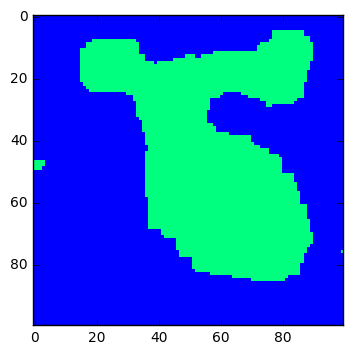

In [13]:
plt.imshow(gibbs_grid[0], interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

In [109]:
-np.sum(model.linear_factors * observation3)

-0.0

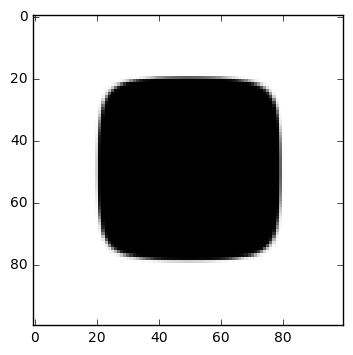

In [5]:
save_video('images/LBP2obs1',video1)

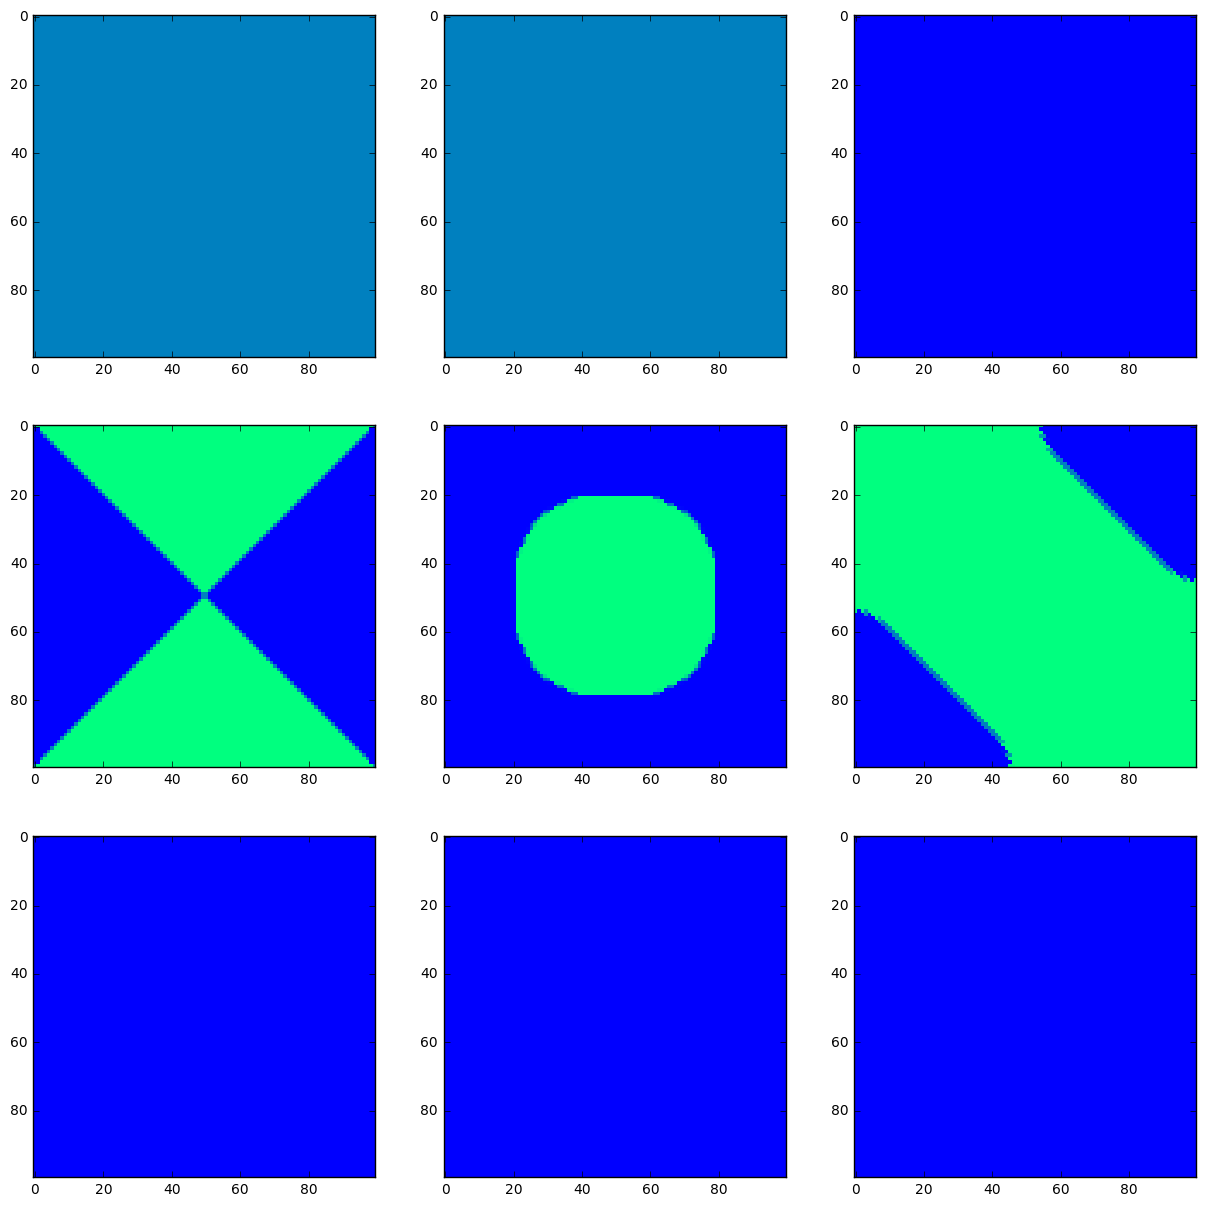

In [14]:
model = IsingGrid(100, 100)
model.constant_init(0,3,3)
grid = np.zeros((model.height, model.width))
#model.linear_factors = model.gibbs_sampling(model.random_grid(0.5))[0]/100
plt.figure(figsize=(15,15))

plt.subplot(331)
plt.imshow(model.linear_factors, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

mlist = model.meanfields(grid)
plt.subplot(332)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.loopybelief(max_iter=100)
plt.subplot(333)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation2)
mlist1 = model.meanfields(grid, max_iter=500)
plt.subplot(334)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation1)
mlist2 = model.meanfields(grid, max_iter=500)
plt.subplot(335)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation3)
mlist3 = model.meanfields(grid, max_iter=500)
plt.subplot(336)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation2)
model.loopybelief(max_iter=100)
plt.subplot(337)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation1)
model.loopybelief(max_iter=100)
plt.subplot(338)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation3)
model.loopybelief(max_iter=100)
plt.subplot(339)
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

#plt.savefig('images/')

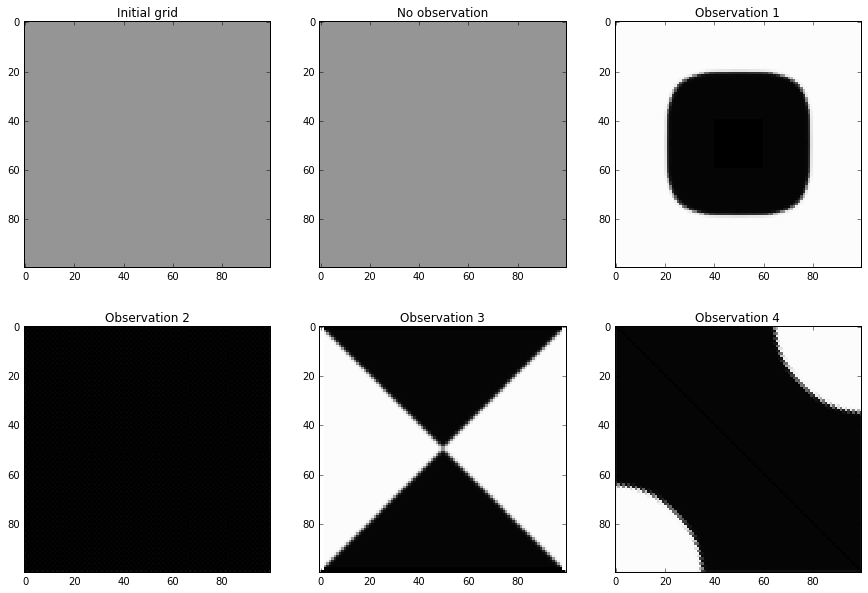

In [41]:
model = IsingGrid(100, 100)
model.constant_init(0,1,1)
grid = np.zeros((model.height, model.width))
#model.linear_factors = model.gibbs_sampling(model.random_grid(0.5))[0]/100


    
plt.figure(figsize=(15,10))

plt.subplot(231)
plt.title('Initial grid')
plt.imshow(model.linear_factors, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

mlist = model.meanfields(grid)
plt.subplot(232)
plt.title('No observation')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation1)
mlist1 = model.meanfields(grid, max_iter=500)
plt.subplot(233)
plt.title('Observation 1')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation2)
mlist2 = model.meanfields(grid, max_iter=500)
plt.subplot(234)
plt.title('Observation 2')

plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation3)
mlist3 = model.meanfields(grid, max_iter=500)
plt.subplot(235)
plt.title('Observation 3')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

model.observe(observation4)
mlist3 = model.meanfields(grid, max_iter=500)
plt.subplot(236)
plt.title('Observation 4')
plt.imshow(model.mean_parameters, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)

plt.savefig('images/meanfields.png')

NameError: name 'observation4' is not defined

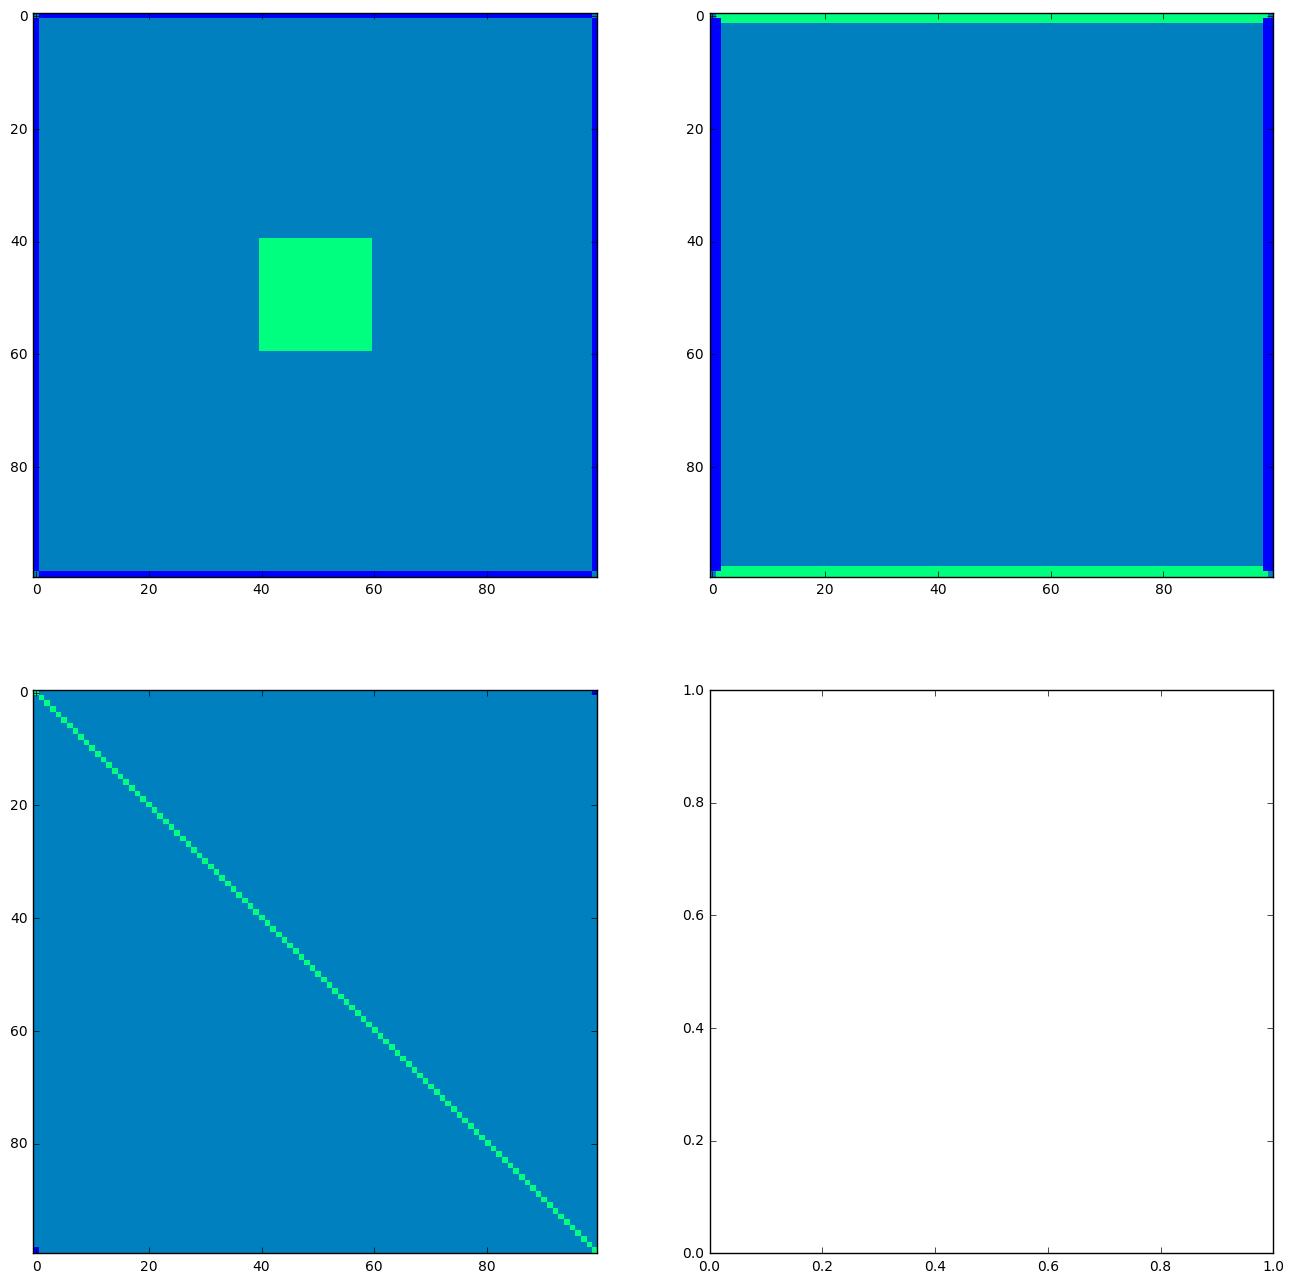

In [8]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(observation1, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.subplot(222)
plt.imshow(observation2, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.subplot(223)
plt.imshow(observation3, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.subplot(224)
plt.imshow(observation4, interpolation="nearest", cmap=plt.get_cmap('winter'), vmin=-1, vmax=1)
plt.savefig('images/observations.png')